**ЧАСТНЫЕ ПРОИЗВОДНЫЕ**

In [1]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**2 + c**8*b

print(diff(f, a))

2*a + 5*b - cos(c)


**ОПТИМИЗАЦИЯ**

$f(x) = \sum_{i=1}^{N-1} \left [ 100 (x_{i+1} - x_{i}^{2})^2 + (1 - x_{i})^2 \right ]$

Функция Розенброка, или, как её ещё называют, функция банана или функция долины, является популярной тестовой задачей для алгоритмов оптимизации на основе градиента. Вы встретитесь с ней ещё не раз, так как её часто используют в качестве эталонного теста для оценки методов оптимизации. Интересно, что придумана она была в 1960 году, то есть уже более 60 лет её используют подобным образом. Мы берём именно эту функцию, потому что она оптимальна для проверки качества алгоритмов.

In [2]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

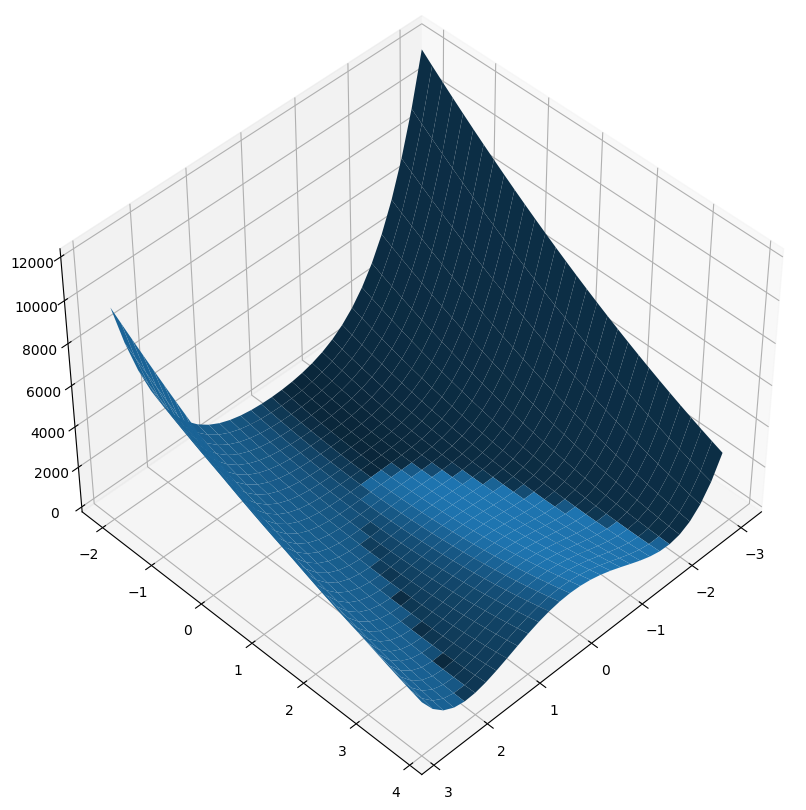

In [3]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[15, 10])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 45)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

Метод Пауэла

In [4]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


метод Нелдера — Мида (также его называют **симплекс-методом**)

In [5]:
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


МНК

In [6]:
#Задание 4.5
#Оптимизируйте функцию Розенброка с помощью уже известного вам метода наименьших квадратов с 
# использованием той же точки, которая фигурировала в наших решениях до этого.
#Для реализации этого алгоритма используется функция least_squares.

In [7]:
import scipy
result_point = scipy.optimize.least_squares(func_rosen, x1)
print(result_point.x.round(3))

[0.939 0.882 0.776 0.603 0.361]


**Метод множителей Лагранжа** является стратегией обнаружения минимумов и максимумов дифференцируемых функций (то есть таких функций, для которых можно найти производную) при условии ограничений равенства на его независимые переменные.

$L(x, \lambda) = f(x) + \sum \lambda_i \phi_i (x)$

In [8]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [9]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


ВЫЧИСЛЕНИЕ ГРАДИЕНТА ДЛЯ ЧИСЛОВЫХ ВЕКТОРОВ В PYTHON

In [10]:
import numpy as np

f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)
 
np.gradient(f)


C:\Users\killr\AppData\Local\Temp\ipykernel_3080\4207521638.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)


array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

Если специально не определять аргумент varargs, то его значение равно 1, так что на границах вектора мы получаем обычную разность для соседних элементов массива:

In [11]:
print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


Внутри вектора для каждого элемента мы считаем разность его соседних значений, но уже поделённую на 2, то есть, по сути, среднее арифметическое для значений:

In [12]:
(f[2] - f[0])/2

In [13]:
(f[3] - f[1])/2

In [14]:
(f[4] - f[2])/2

In [15]:
(f[5] - f[3])/2

Шаг можно варьировать. При его изменении вычисления реализуются так же, но деление происходит на величину обычного шага у края и удвоенную величину шага для элементов внутри вектора:

In [16]:
np.gradient(f, 2)

array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

In [17]:
for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))

2.75
4.0
5.5
6.0


In [18]:
#6.6
w0, w1 = symbols("w_0 w_1", real=True)
f = (2.1-w0-w1)**2 + (2.9-w0-3*w1)**2 + (4.1-w0-5*w1)**2
fw0 = f.diff(w0)
fw1 = f.diff(w1)
sols = solve([fw0,fw1],w0,w1)
print(float(sols[w0]),float(sols[w1]))

1.5333333333333334 0.5


In [19]:
#Задание 6.7
#Пусть дан одномерный массив 
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
#Вычислите градиент массива , увеличив шаг сетки в семь раз, и укажите значение седьмого элемента массива получившихся градиентов .
np.gradient(f, 7)[7]

**ГРАДИЕНТНЫЙ СПУСК**

$x_{n+1} = x_n - \alpha \nabla f (x_n)$

Определим простейшую выпуклую функцию

In [20]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

Определим функцию, которая вычислит градиент

In [21]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

запрограммируем простейший вариант для градиентного спуска

In [49]:
x = np.random.uniform(0, 3, size = 2)
x

array([2.49335792, 2.03872112])

In [50]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

Напишем функцию, которая будет строить график

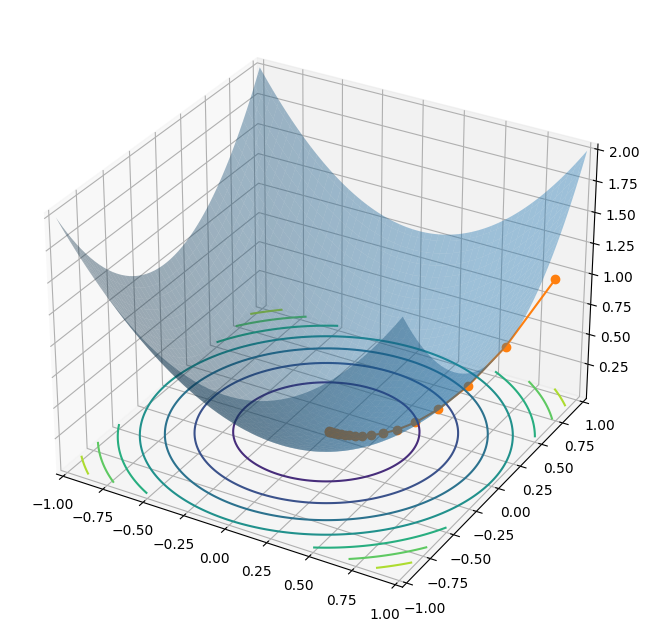

In [60]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100) #размечаем координаты по x
    y_ = np.linspace(-1, 1, 100) #размечаем координаты по y
    x, y = np.meshgrid(x_, y_) #задаем все возможные пары x,y в которых нам надо вычислить функцию, чтобы наричовать график
    z = fun(x, y) # Вычисляем значение функции в каждой точке сетки
    ax = fig.add_subplot(1, 1, 1, projection='3d') #Создаем 3д холст
    ax.plot_surface(x, y, z, alpha=0.4) #СТроим 3д график с прозрачностью альфа
    ax.contour(x, y, z, zdir='z', offset=z.min()) #рисуем линии уровня
    z_trace = fun(trace[:, 0], trace[:, 1]) # считаем значения функции в каждой точке алгоритам град спука
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")  #Рисуем линию - последовательных значений функции в точках алгоритма
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())
    
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

**ГРАДИЕНТНЫЙ СПУСК С MOMENTUM**

$x_{n+1}=x_n - \alpha\nabla f(x_n) + \gamma(x_n - x_{n-1})$

Идея заключается в том, что на каждой итерации градиентного спуска  изменяется градиент, помноженный не только на темп обучения, но и на вектор, на который мы передвинулись в предыдущем шаге, с некоторым коэффициентом.